In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

data = sns.load_dataset('iris')

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
data['length'] = data['sepal_length'] + data['petal_length']
data['width'] = data['sepal_width'] + data['petal_width']
data = data.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'], axis = 1)
data.head()

,length,width
0,6.5,3.7
1,6.3,3.2
2,6.0,3.4
3,6.1,3.3
4,6.4,3.8


In [16]:
def loss_function(m,b, points):
  total_error = 0
  for i in range(0, len(points)):
    x = points.iloc[i, 0]
    y = points.iloc[i, 1]
    total_error += (y - (m * x + b)) ** 2
  return total_error / float(len(points))

In [19]:
def gradient_descent(m_now, b_now, points, learning_rate):
  m_gradient = 0
  b_gradient = 0
  N = len(points)
  for i in range(N):
    x = points.iloc[i, 0]
    y = points.iloc[i, 1]

    m_gradient += -(2/N) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/N) * (y - (m_now * x + b_now))

  m = m_now - learning_rate * m_gradient
  b = b_now - learning_rate * b_gradient
  return m, b

In [21]:
m = 0
b = 0
learning_rate = 0.0001
epochs = 300

for i in range(epochs):
  if i % 100 == 0:
    print(f"Epoch {i}")
  m, b = gradient_descent(m, b, data, learning_rate)

print(m,b)

Epoch 0
Epoch 100
Epoch 200
0.4237653785767913 0.04915426055532792


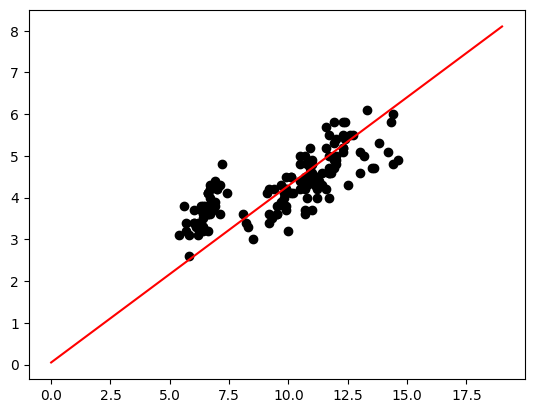

In [27]:
plt.scatter(data.length, data.width, color = 'black')
plt.plot(list(range(0, 20)), [m * x + b for x in range(0, 20)], color='Red')
plt.show()